In [6]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv('biznes_daromadlari.csv')
print(df.head(20))

   Kompaniya_nomi  Ishch_soni  Yil_invest(mln)   Yil  Yil_daromad (mln)
0     OptimaTrade         277             8094  2018              12428
1     SmartVision         427             1595  2023               4269
2        NextStep          42             3404  2022               1074
3      GreenWorld          57             3863  2021              11953
4     OptimaTrade         416             5332  2020               1648
5         SunRise          71             1953  2018               6793
6         AvtoMax         225             6685  2018               6957
7     OptimaTrade         302             1391  2021               8009
8        NextStep         108             3681  2020              10407
9      GreenWorld         181             7654  2020               5277
10    SmartVision         369             7380  2023              13625
11       NextStep         223             1736  2023               4354
12       NextStep         484             3796  2023            

In [16]:
le = LabelEncoder()
df['Kompaniya_nomi'] = le.fit_transform(df['Kompaniya_nomi'])

In [18]:
# X va y ni ajratamiz
X = df.drop("Yil_daromad (mln)", axis=1)
y = df["Yil_daromad (mln)"]

In [19]:
#Model va Cross-Validation tayyorlaymiz
model = LinearRegression()
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [20]:
#Cross-validationni bajarish
scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)

In [24]:
print("\nHar bir fold uchun RMSE:")
print(rmse_scores)
print("\nO'rtacha RMSE:", np.mean(rmse_scores))


Har bir fold uchun RMSE:
[5163.60794052 4302.26305383 4019.39452413 4048.21325918 4188.94136123]

O'rtacha RMSE: 4344.484027778542


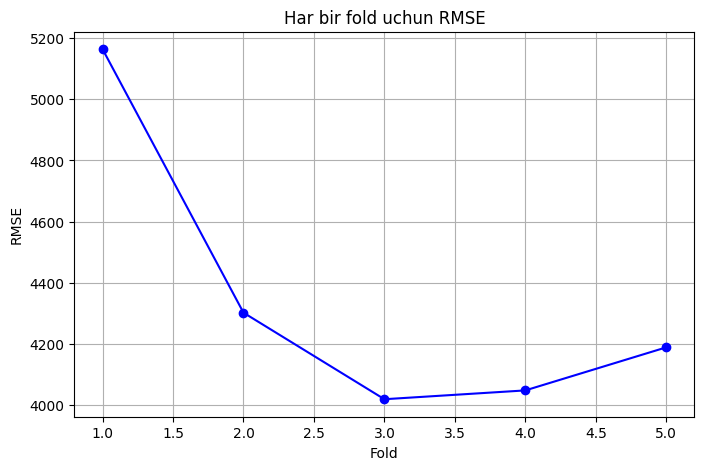

In [23]:
#Vizualizatsiya: RMSE qiymatlarini grafik ko'rinishda chiqaramiz
plt.figure(figsize=(8,5))
plt.plot(range(1, 6), rmse_scores, marker='o', linestyle='-', color='blue')
plt.title('Har bir fold uchun RMSE')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.grid(True)
plt.show()